In [6]:
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import dask.dataframe as ddf
import psutil
# from pylab import rcParams
# plt.rcParams['figure.figsize'] = 14, 8
# RANDOM_SEED = 42
# LABELS = ["alive", "Death"]

In [7]:
df = pd.read_csv('spneodeath_clean.csv')
df.describe()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
count,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,...,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06,1.277148e+06
mean,1.012354e+00,2.823321e+01,2.090997e+00,4.216266e+00,8.275971e-01,2.395071e-01,4.879380e+00,1.029510e+00,1.567570e+00,3.723224e+00,...,2.271142e+00,1.058415e+00,5.264887e-01,3.196121e-01,3.833380e+01,1.046613e+00,1.208808e+00,3.905048e+00,3.953085e+00,6.127716e-03
std,1.542648e-01,6.687282e+00,1.375772e+00,6.304390e-01,1.104993e+00,5.728221e-01,4.320864e-01,1.747430e-01,4.954134e-01,5.798743e-01,...,1.432523e+00,1.306026e+00,1.030181e+00,6.354840e-01,2.111963e+00,2.206736e-01,4.253384e-01,1.445278e+00,2.616306e+00,7.803955e-02
min,1.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.300000e+01,1.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,1.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,0.000000e+00
50%,1.000000e+00,2.800000e+01,2.000000e+00,4.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,3.900000e+01,1.000000e+00,1.000000e+00,5.000000e+00,3.000000e+00,0.000000e+00
75%,1.000000e+00,3.300000e+01,2.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,5.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,...,4.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,4.000000e+01,1.000000e+00,1.000000e+00,5.000000e+00,5.000000e+00,0.000000e+00
max,4.000000e+00,6.300000e+01,9.000000e+00,9.000000e+00,1.800000e+01,1.900000e+01,6.000000e+00,3.000000e+00,2.000000e+00,4.000000e+00,...,5.000000e+00,3.900000e+01,8.000000e+01,8.000000e+01,4.600000e+01,3.000000e+00,4.000000e+00,5.000000e+00,1.100000e+01,1.000000e+00


In [8]:
df.head()

,tp_birth_place,maternal_age,tp_marital_status,tp_maternal_education_years,num_live_births,num_fetal_losses,tp_pregnancy_duration,tp_pregnancy,tp_labor,tp_prenatal_appointments,...,tp_maternal_skin_color,num_gestations,num_normal_labors,num_cesarean_labors,num_gestational_weeks,tp_presentation_newborn,tp_childbirth_assistance,tp_fill_form_responsible,cd_robson_group,neonatal_death
0,1,32,2.0,4.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,5.0,5.0,0
1,1,40,1.0,3.0,4,1,5.0,1.0,2.0,4,...,4.0,5,4,0,40,2.0,1.0,5.0,7.0,0
2,1,31,2.0,5.0,1,0,5.0,1.0,2.0,4,...,1.0,1,0,1,39,1.0,1.0,2.0,5.0,0
3,1,19,5.0,4.0,2,0,5.0,1.0,1.0,4,...,4.0,2,2,0,39,1.0,1.0,5.0,4.0,0
4,1,33,1.0,4.0,5,0,5.0,1.0,1.0,2,...,2.0,5,5,0,40,1.0,2.0,2.0,3.0,0


In [9]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1277148 entries, 0 to 1277147
Data columns (total 24 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   tp_birth_place               1277148 non-null  int64  
 1   maternal_age                 1277148 non-null  int64  
 2   tp_marital_status            1277148 non-null  float64
 3   tp_maternal_education_years  1277148 non-null  float64
 4   num_live_births              1277148 non-null  int64  
 5   num_fetal_losses             1277148 non-null  int64  
 6   tp_pregnancy_duration        1277148 non-null  float64
 7   tp_pregnancy                 1277148 non-null  float64
 8   tp_labor                     1277148 non-null  float64
 9   tp_prenatal_appointments     1277148 non-null  int64  
 10  cd_apgar1                    1277148 non-null  int64  
 11  cd_apgar5                    1277148 non-null  int64  
 12  newborn_weight               1277148 non-n

Class 0: 1269322
Class 1: 7826
Proportion: 162.19 : 1


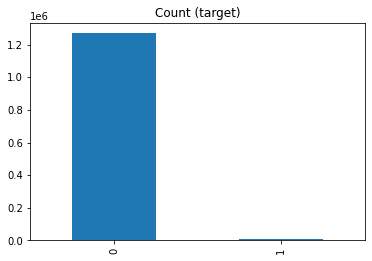

In [10]:
target_count = df.neonatal_death.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [11]:
df.isnull().sum()

tp_birth_place                 0
maternal_age                   0
tp_marital_status              0
tp_maternal_education_years    0
num_live_births                0
num_fetal_losses               0
tp_pregnancy_duration          0
tp_pregnancy                   0
tp_labor                       0
tp_prenatal_appointments       0
cd_apgar1                      0
cd_apgar5                      0
newborn_weight                 0
has_congenital_malformation    0
tp_maternal_skin_color         0
num_gestations                 0
num_normal_labors              0
num_cesarean_labors            0
num_gestational_weeks          0
tp_presentation_newborn        0
tp_childbirth_assistance       0
tp_fill_form_responsible       0
cd_robson_group                0
neonatal_death                 0
dtype: int64

In [12]:
# Class count
count_class_0, count_class_1 = df.neonatal_death.value_counts()

# Divide by class
df_class_0 = df[df['neonatal_death'] == 0]
df_class_1 = df[df['neonatal_death'] == 1]


In [13]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.neonatal_death.value_counts())

Random under-sampling:
0    7826
1    7826
Name: neonatal_death, dtype: int64


In [14]:
X = df.drop('neonatal_death',axis='columns')
y = df['neonatal_death']

In [15]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    1269322
1    1269322
Name: neonatal_death, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [17]:
# Number of classes in training Data
y_train.value_counts()

1    1015458
0    1015457
Name: neonatal_death, dtype: int64

Splitting the Features and Target

In [35]:
#Set up a standard scaler for the features
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
col_names = list(X.columns)
s_scaler = preprocessing.StandardScaler()
X_df= s_scaler.fit_transform(X)
X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tp_birth_place,1277148.0,5.473160e-16,1.0,-0.080084,-0.080084,-0.080084,-0.080084,19.367002
maternal_age,1277148.0,-3.356745e-17,1.0,-2.726551,-0.782562,-0.034874,0.712814,5.198944
tp_marital_status,1277148.0,-1.138962e-16,1.0,-0.793007,-0.793007,-0.066142,-0.066142,5.021912
tp_maternal_education_years,1277148.0,6.833995e-16,1.0,-6.687828,-0.343041,-0.343041,1.243156,7.587943
num_live_births,1277148.0,1.262917e-17,1.0,-0.748962,-0.748962,0.156022,0.156022,15.540746
num_fetal_losses,1277148.0,3.438250e-18,1.0,-0.418118,-0.418118,-0.418118,-0.418118,32.751004
tp_pregnancy_duration,1277148.0,-9.768246e-16,1.0,-8.978254,0.279156,0.279156,0.279156,2.593509
tp_pregnancy,1277148.0,-6.385464e-16,1.0,-0.168874,-0.168874,-0.168874,-0.168874,11.276508
tp_labor,1277148.0,8.963929e-17,1.0,-1.145650,-1.145650,0.872867,0.872867,0.872867
tp_prenatal_appointments,1277148.0,-3.317271e-16,1.0,-4.696233,0.477304,0.477304,0.477304,0.477304


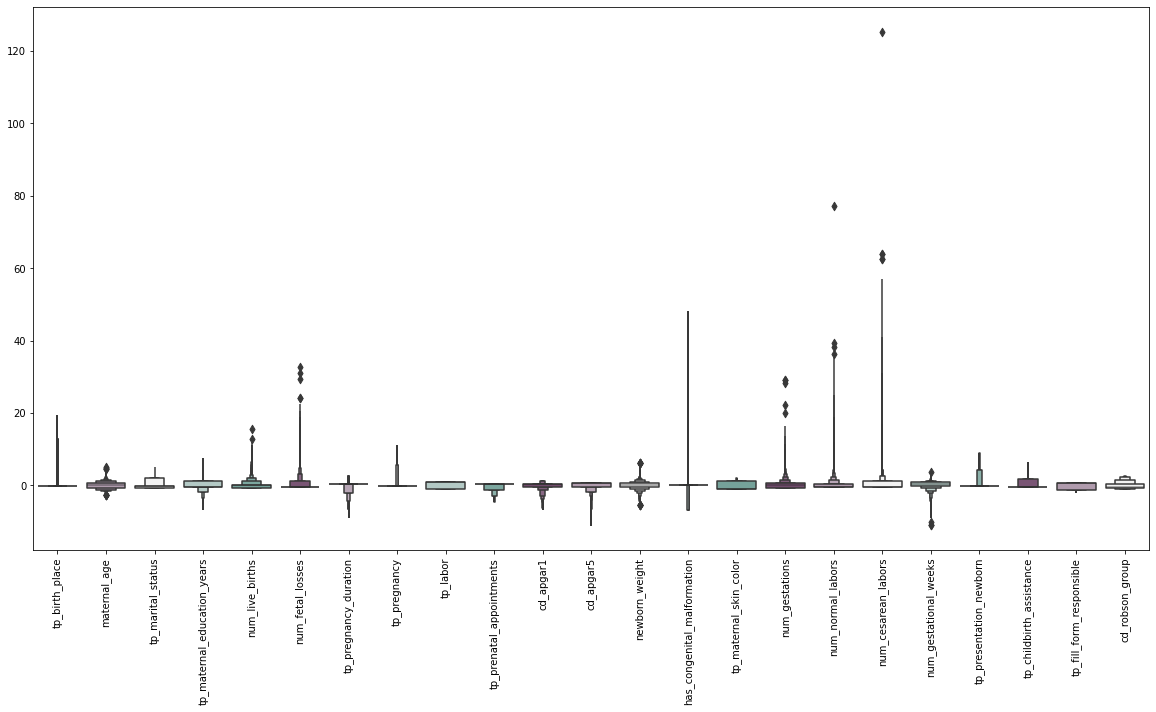

In [36]:
#looking at the scaled features
colours =["#774571","#b398af","#f1f1f1" ,"#afcdc7", "#6daa9f"]
plt.figure(figsize=(20,10))
sb.boxenplot(data = X_df,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
accuracy_list = []
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(X_train, y_train)
kn_pred = kn_clf.predict(X_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [ ]:
#import Fore from colorama to color the text
from colorama import Fore
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))